In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams19.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,LR
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,LR
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,LR
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,LR
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,LR


In [3]:
len(df)

17665

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              17665 non-null  int64  
 1   N_Person           17665 non-null  int64  
 2   Xcenter            17665 non-null  float64
 3   Ycenter            17665 non-null  float64
 4   PerXmin            17665 non-null  float64
 5   PerYmin            17665 non-null  float64
 6   PerXmax            17665 non-null  float64
 7   PerYmax            17665 non-null  float64
 8   N_Handgun          17665 non-null  int64  
 9   HgXcenter          17665 non-null  float64
 10  HgYcenter          17665 non-null  float64
 11  HgXmin             17665 non-null  float64
 12  HgYmin             17665 non-null  float64
 13  HgXmax             17665 non-null  float64
 14  HgYmax             17665 non-null  float64
 15  Intersection       17665 non-null  object 
 16  Included_Center    176

In [5]:
df.nunique()

Frame                 1933
N_Person                 4
Xcenter              13807
Ycenter              13788
PerXmin              13815
PerYmin              13812
PerXmax              13815
PerYmax              13793
N_Handgun                5
HgXcenter             7262
HgYcenter             7260
HgXmin                7264
HgYmin                7264
HgXmax                7264
HgYmax                7263
Intersection             9
Included_Center          2
Intersection_Area     7728
Hg_Area               7264
Distance             17665
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    14360
0     3305
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,LR,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,LR,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,LR,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,LR,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,LR,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17665 non-null  int64  
 1   N_Person                      17665 non-null  int64  
 2   Xcenter                       17665 non-null  float64
 3   Ycenter                       17665 non-null  float64
 4   PerXmin                       17665 non-null  float64
 5   PerYmin                       17665 non-null  float64
 6   PerXmax                       17665 non-null  float64
 7   PerYmax                       17665 non-null  float64
 8   N_Handgun                     17665 non-null  int64  
 9   HgXcenter                     17665 non-null  float64
 10  HgYcenter                     17665 non-null  float64
 11  HgXmin                        17665 non-null  float64
 12  HgYmin                        17665 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'LR', 0: 'SVM'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    14360
0     3305
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17665 non-null  int64  
 1   N_Person                      17665 non-null  int64  
 2   Xcenter                       17665 non-null  float64
 3   Ycenter                       17665 non-null  float64
 4   PerXmin                       17665 non-null  float64
 5   PerYmin                       17665 non-null  float64
 6   PerXmax                       17665 non-null  float64
 7   PerYmax                       17665 non-null  float64
 8   N_Handgun                     17665 non-null  int64  
 9   HgXcenter                     17665 non-null  float64
 10  HgYcenter                     17665 non-null  float64
 11  HgXmin                        17665 non-null  float64
 12  HgYmin                        17665 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14132, 28) (14132,)
(3533, 28) (3533,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.8867660627016123
mean_test =  0.884163120588674


,fit_time,score_time,test_score,train_score
0,0.092749,0.002992,0.891089,0.892515
1,0.090755,0.002992,0.884017,0.883000
2,0.091752,0.002994,0.886058,0.884818
3,0.093747,0.001995,0.878273,0.886469
4,0.091751,0.002992,0.885350,0.886548
5,0.088760,0.002992,0.876858,0.888042
6,0.099730,0.002993,0.876150,0.884818
7,0.091751,0.003022,0.897381,0.886076
8,0.093748,0.002962,0.879689,0.887727
9,0.093723,0.003021,0.886766,0.887648


                         feature  importance       std
27         Intersection_Up_right    0.000000  0.000000
20     Intersection_Center_right    0.000000  0.000000
21      Intersection_Down_center    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
23           Intersection_Inside    0.000000  0.000000
8                      N_Handgun    0.000231  0.000694
14                        HgYmax    0.000394  0.001182
19      Intersection_Center_left    0.000476  0.001427
1                       N_Person    0.001021  0.001889
26          Intersection_Up_left    0.001055  0.003166
15               Included_Center    0.003640  0.007464
7                        PerYmax    0.004612  0.008917
25        Intersection_Up_center    0.008972  0.017983
4                        PerXmin    0.013641  0.010819
17                       Hg_Area    0.016280  0.022867
3                        Ycenter    0.020867  0.052278
6                        PerXmax    0.022834  0.038181
13        

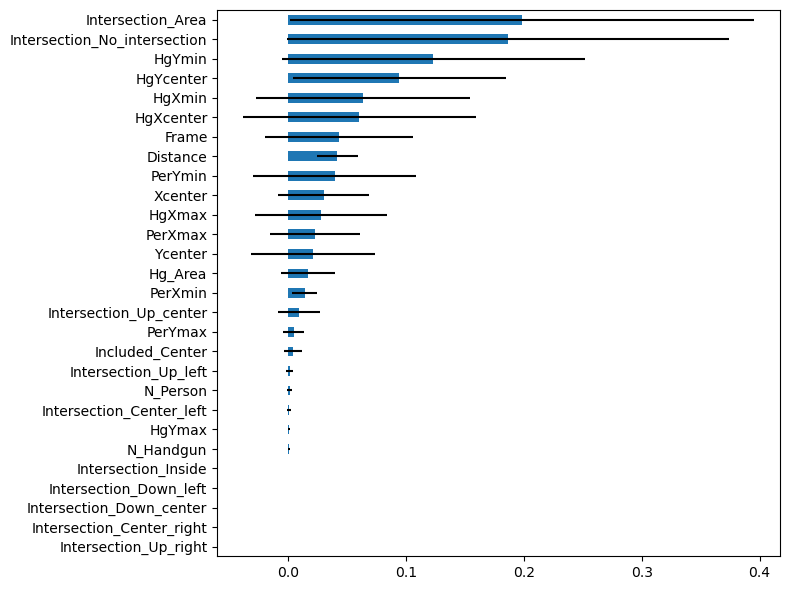

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.62      0.68       652
           1       0.92      0.95      0.94      2881

    accuracy                           0.89      3533
   macro avg       0.84      0.79      0.81      3533
weighted avg       0.89      0.89      0.89      3533



In [17]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [18]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         17665 non-null  int64  
 1   N_Person                      17665 non-null  int64  
 2   Xcenter                       17665 non-null  float64
 3   Ycenter                       17665 non-null  float64
 4   PerXmin                       17665 non-null  float64
 5   PerYmin                       17665 non-null  float64
 6   PerXmax                       17665 non-null  float64
 7   PerYmax                       17665 non-null  float64
 8   N_Handgun                     17665 non-null  int64  
 9   HgXcenter                     17665 non-null  float64
 10  HgYcenter                     17665 non-null  float64
 11  HgXmin                        17665 non-null  float64
 12  HgYmin                        17665 non-null  float64
 13  H

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.83245802, -1.00954585,  0.39592505, -1.05171702,  0.41163961,
        -0.80236114,  0.36467142, -1.40459933, -0.49279594,  0.6835332 ,
        -1.25181942,  0.73467364, -1.17570939,  0.63079154, -1.32351467,
         1.21956038, -0.00603209, -0.62654756, -0.73368368,  2.82097691,
        -0.28020559, -0.01682634, -0.01064101, -0.52956927, -1.13355929,
        -0.11810115, -0.06123898, -0.12873862],
       [-1.83031189, -1.00954585,  0.39564158, -1.05112992,  0.41066795,
        -0.80067488,  0.36511533, -1.40732082, -0.49279594,  0.68192672,
        -1.25267054,  0.73165359, -1.17635958,  0.63058893, -1.32456837,
         1.21956038, -0.00347819, -0.62039922, -0.73226079,  2.82097691,
        -0.28020559, -0.01682634, -0.01064101, -0.52956927, -1.13355929,
        -0.11810115, -0.06123898, -0.12873862],
       [-1.82816577, -1.00954585,  0.3962572 , -1.05327187,  0.41212126,
        -0.80472259,  0.36483538, -1.40334901, -0.49279594,  0.68174686,
        -1.25407969,  0.7315

In [21]:
print(scaler.mean_)

[8.53844098e+02 8.83838098e-01 3.90349376e+02 3.82347133e+02
 3.03894376e+02 2.46323737e+02 4.76804376e+02 5.18370529e+02
 2.94820266e-01 3.06082071e+02 3.12179878e+02 2.82907240e+02
 2.92889767e+02 3.29256902e+02 3.31469990e+02 4.02037928e-01
 8.54438183e+02 1.97042326e+03 2.37359281e+02 1.11633173e-01
 7.27993207e-02 2.83045570e-04 1.13218228e-04 2.19020662e-01
 5.62354939e-01 1.37560147e-02 3.73620153e-03 1.63034249e-02]


In [22]:
print(scaler.scale_)

[4.65955612e+02 8.75480888e-01 2.13803280e+02 6.91860878e+01
 2.22240211e+02 1.12070496e+02 2.13390113e+02 3.95894822e+01
 5.98260336e-01 1.51857901e+02 9.75635291e+01 1.51301376e+02
 9.93223247e+01 1.52891559e+02 9.63265863e+01 4.90309527e-01
 1.57706291e+03 1.73796070e+03 1.37986427e+02 3.14914604e-01
 2.59806812e-01 1.68215771e-02 1.06398031e-02 4.13582654e-01
 4.96096625e-01 1.16476550e-01 6.10101822e-02 1.26639738e-01]


In [23]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [24]:
X_train.shape

(13248, 28)

In [25]:
y_train.value_counts()

1    10769
0     2479
Name: Ground_Truth, dtype: int64

In [26]:
X_test.shape

(4417, 28)

In [27]:
y_test.value_counts()

1    3591
0     826
Name: Ground_Truth, dtype: int64

In [28]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[8.87118385e-03, 9.91128816e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       ...,
       [9.99999937e-01, 6.31088004e-08],
       [6.66133815e-16, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00]])

In [29]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       826
           1       0.98      0.99      0.99      3591

    accuracy                           0.98      4417
   macro avg       0.97      0.96      0.96      4417
weighted avg       0.98      0.98      0.98      4417



In [32]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9852807971014492
Score test =  0.9773601992302468


In [30]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 